<a href="https://colab.research.google.com/github/arquansa/PSTB-exercises/blob/main/Week02/Day4/DC4/W2D4DCG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Daily challenge GOLD: DNA
Last Updated: September 13th, 2024

What You will learn :
OOP
Inheritance


Instructions :
This challenge is about Biology that will put emphasis on your knowledge of classes, inheritance and polymorphism.

Build a DNA object. DNA is composed of chromosomes which is itself composed of Genes.
A Gene is a single value 0 or 1, it can mutate (flip).
A Chromosome is a series of 10 Genes. It also can mutate, meaning a random number of genes can randomly flip (1/2 chance to flip).
A DNA is a series of 10 chromosomes, and it can also mutate the same way Chromosomes can mutate.

Implement these classes as you see fit.

Create a new class called Organism that accepts a DNA object and an environment parameter that sets the probability for its DNA to mutate.

Instantiate a number of Organism and let them mutate until one gets to a DNA which is only made of 1s. Then stop and record the number of generations (iterations) it took.
Write your results in you personal biology research notebook and tell us your conclusion :).

 Implementation in Python

🧬 Breakdown of the DNA System
Gene
A single value: 0 or 1

Can mutate (flip the bit)

Chromosome
Contains 10 Genes

Can mutate: randomly decide to mutate each gene (with 50% chance per gene)

DNA
Contains 10 Chromosomes

Can mutate: each chromosome mutates with 50% chance

Organism
Contains a DNA

Has an environment parameter: probability that its DNA mutates at each generationimport random

class Gene:
    def __init__(self, value=None):
        self.value = value if value in (0, 1) else random.randint(0, 1)

    def mutate(self):
        self.value = 1 - self.value  # Flip 0 -> 1 or 1 -> 0

    def __repr__(self):
        return str(self.value)


class Chromosome:
    def __init__(self):
        self.genes = [Gene() for _ in range(10)]

    def mutate(self):
        for gene in self.genes:
            if random.random() < 0.5:
                gene.mutate()

    def is_all_ones(self):
        return all(gene.value == 1 for gene in self.genes)

    def __repr__(self):
        return ''.join(str(gene) for gene in self.genes)


class DNA:
    def __init__(self):
        self.chromosomes = [Chromosome() for _ in range(10)]

    def mutate(self):
        for chromosome in self.chromosomes:
            if random.random() < 0.5:
                chromosome.mutate()

    def is_perfect(self):
        return all(chromosome.is_all_ones() for chromosome in self.chromosomes)

    def __repr__(self):
        return '\n'.join(str(chromosome) for chromosome in self.chromosomes)


class Organism:
    def __init__(self, environment_mutation_chance):
        self.dna = DNA()
        self.environment = environment_mutation_chance  # Probability to mutate

    def mutate(self):
        if random.random() < self.environment:
            self.dna.mutate()

    def is_perfect(self):
        return self.dna.is_perfect()


 Running the Simulation

In [ ]:
def run_simulation(environment_mutation_chance=0.05):
    organism = Organism(environment_mutation_chance)
    generations = 0

    while not organism.is_perfect():
        organism.mutate()
        generations += 1

    return generations, organism


# Run the simulation
generations_needed, evolved_organism = run_simulation()

print(f"🎉 Perfect DNA achieved in {generations_needed} generations!\n")
print("Final DNA:")
print(evolved_organism.dna)


#📓 Conclusion in Biology Notebook
Date: August 10, 2025

Subject: DNA Evolution Simulation

Environment Mutation Rate: 5%

Result: It took X generations (variable) for the organism to achieve a DNA composed entirely of 1s.

**Conclusion:**

This experiment showcases how stochastic mutation across multiple levels of biological hierarchy can lead to full-genome convergence over time.

The process is heavily dependent on the mutation rate and randomness, making it a simplistic model of biological evolution via mutation alone.



Visualization

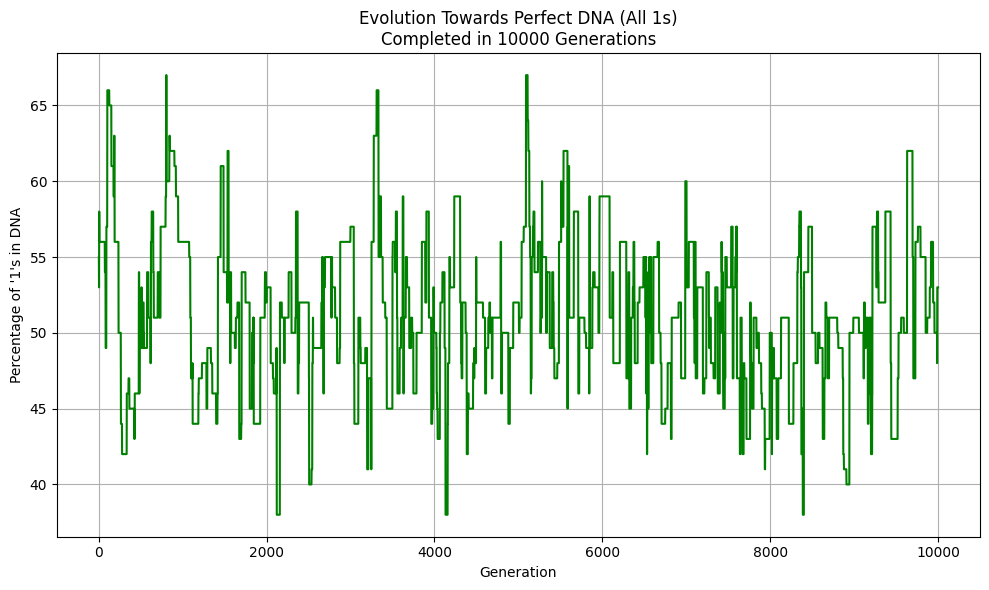

In [1]:
import matplotlib.pyplot as plt
import random

class Gene:
    def __init__(self, value=None):
        self.value = value if value in (0, 1) else random.randint(0, 1)

    def mutate(self):
        self.value = 1 - self.value

class Chromosome:
    def __init__(self):
        self.genes = [Gene() for _ in range(10)]

    def mutate(self):
        for gene in self.genes:
            if random.random() < 0.5:
                gene.mutate()

    def is_all_ones(self):
        return all(gene.value == 1 for gene in self.genes)

    def count_ones(self):
        return sum(gene.value for gene in self.genes)

class DNA:
    def __init__(self):
        self.chromosomes = [Chromosome() for _ in range(10)]

    def mutate(self):
        for chromosome in self.chromosomes:
            if random.random() < 0.5:
                chromosome.mutate()

    def is_perfect(self):
        return all(chromosome.is_all_ones() for chromosome in self.chromosomes)

    def count_total_ones(self):
        return sum(chromosome.count_ones() for chromosome in self.chromosomes)

    def total_genes(self):
        return len(self.chromosomes) * 10

class Organism:
    def __init__(self, environment_mutation_chance):
        self.dna = DNA()
        self.environment = environment_mutation_chance

    def mutate(self):
        if random.random() < self.environment:
            self.dna.mutate()

    def is_perfect(self):
        return self.dna.is_perfect()

    def percent_ones(self):
        return self.dna.count_total_ones() / self.dna.total_genes()

def simulate_with_tracking(environment_mutation_chance=0.05, max_generations=10000):
    organism = Organism(environment_mutation_chance)
    generations = 0
    history = []

    while not organism.is_perfect() and generations < max_generations:
        organism.mutate()
        generations += 1
        history.append(organism.percent_ones())

    return generations, history, organism

# Run the simulation and plot the result
generations_needed, ones_history, final_organism = simulate_with_tracking()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ones_history) + 1), [x * 100 for x in ones_history], color='green')
plt.xlabel("Generation")
plt.ylabel("Percentage of '1's in DNA")
plt.title(f"Evolution Towards Perfect DNA (All 1s)\nCompleted in {generations_needed} Generations")
plt.grid(True)
plt.tight_layout()
plt.show()
